In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

P.1.1.1. Точка (X, Y) имеет двумерное распределение с плотностью $2 I\{0 < x < y < 1\}$.

Сгенерировать 100 таких точек с помощью метода условных распределений и оценить средние значения X и Y.

$f_X(x) = 2(1-x) I\{x>0\} I\{x < 1\}$

$f_{Y|X}(y|x) = \frac{1}{1-x} I\{x < y < 1\}$

⇒ $F_X(x) = 2x - x^2$, если $x \in [0,1]$

$F_{Y|X}(y|x) = \frac{y-x}{1-x}$, если $y \in [x, 1]$

Тогда

$F_X^{-1}(a) = 1 - \sqrt{1-a}$

$F_{Y|X}^{-1}(b|x) = x + b (1-x)$

In [ ]:
def F_X_rev(a):
    if a < 0 or a > 1:
        return None

    return 1 - (1-a)**(0.5)

def F_Y_X_rev(b, x):
    if b < 0 or b > 1 or x < 0 or x > 1:
        return None

    return x + b * (1 - x)

def generate_this_distr(size: int):
    r = st.uniform.rvs(size=(size, 2))
    res = []

    for el in r:
        x = F_X_rev(el[0])
        y = F_Y_X_rev(el[1], x)

        res.append(np.array([x, y]))

    return np.array(res)

In [ ]:
sample = generate_this_distr(100)

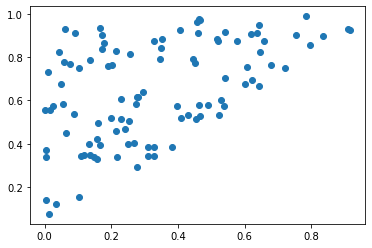

In [ ]:
plt.scatter(*sample.T)

In [ ]:
print(f'Среднее значение X = {np.mean(sample.T[0])}, EX={1/3}\nСреднее значение Y = {np.mean(sample.T[1])}, EY={2/3}')

Среднее значение X = 0.3303040053648542, EX=0.3333333333333333
Среднее значение Y = 0.6428732226093336, EY=0.6666666666666666


P.1.1.2. Дом культуры Анчурийского Государственного Университета представляет собой круглый зрительный зал радиуса 50 метров  и прямоугольную сцену шириной 100 метров и глубиной 20 метров (круг касается извне длинной стороны прямоугольника, деля ее точной касания пополам). Оценить среднее расстояние между человеком, находящимся в случайном месте сцены, и человеком, находящимся в случайной точке ДК.

In [ ]:
# schema of place
x1 = np.arange(-50, 50+1/4, 1/4)
y1 = list(map(lambda x: (50**2-x**2)**(0.5), x1))
y2 = list(map(lambda x: -(50**2-x**2)**(0.5), x1))

x2 = [-50, 50]
y3 = [50, 50]
y4 = [70, 70]

x3 = [-50, -50]
x4 = [50, 50]
y5 = [50, 70]

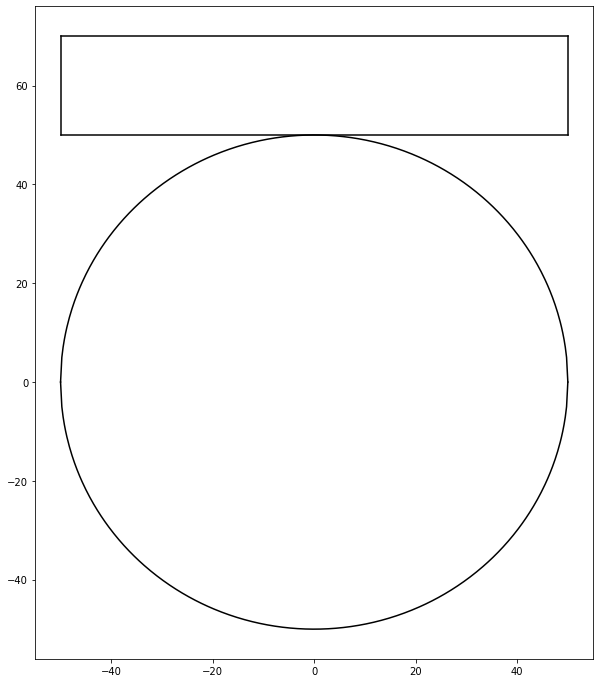

In [ ]:
plt.figure(figsize=(10,10*6/5))
plt.plot(x1, y1, x1, y2, x2, y3, x2, y4, x3, y5, x4, y5, color='k')
plt.show()

$S_{circle} = 2500\pi $ метров квадратных.

$S_{rect} = 2000$ метров квадратных.

Будем понимать под ДК именно зрительский зал. Иначе просто бросаем монетку с вероятностью $\frac{S_{circle}}{S_{circle} + S_{rect}}$ и если выпала 1, то генерируем точку в круге, а если 0 - то в прямоугольнике.

Генерируем точку на сцене, генерируя две независимые равномерные величины.

Генерируем точку в круге, генерируя две независимые равномерные величины, пока они не попадут в круг.

In [ ]:
def generate_in_rect():
    return np.array([st.uniform.rvs(loc=-50, scale=100), st.uniform.rvs(loc=50, scale=20)])

def generate_in_circle():
    while True:
        x = st.uniform.rvs(loc=-50, scale=100)
        y = st.uniform.rvs(loc=-50, scale=100)

        if x**2 + y**2 <= 50**2:
            return np.array([x, y])

def generate_in_all_place():
    S_circle = 50**2 * np.pi
    S_rect = 100 * 20

    p = S_circle / (S_circle + S_rect)

    x = st.bernoulli.rvs(p=p)

    if x == 1:
        return generate_in_circle()
    else:
        return generate_in_rect()

    return None

In [ ]:
S_circle = 50**2 * np.pi
S_rect = 100 * 20
S_circle, S_rect

(7853.981633974483, 2000)

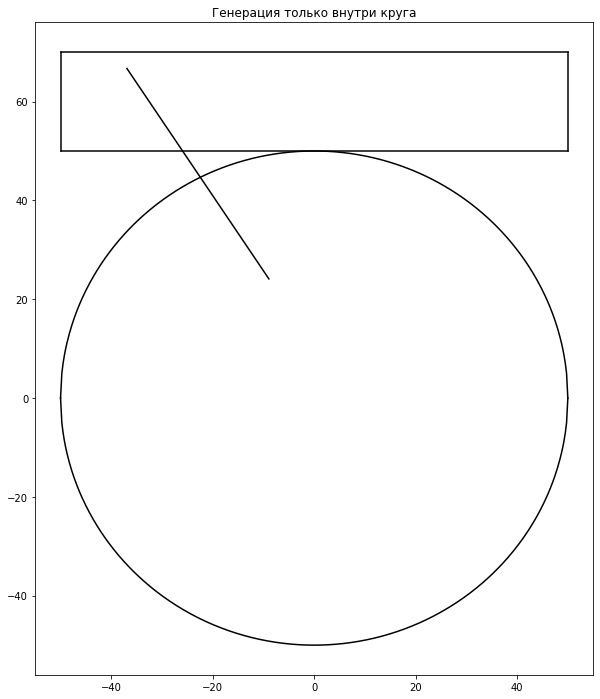

In [ ]:
plt.figure(figsize=(10,10*6/5))

p_in_circle = generate_in_circle()
p_in_rect = generate_in_rect()

x = [p_in_circle[0], p_in_rect[0]]
y = [p_in_circle[1], p_in_rect[1]]

plt.plot(x1, y1, x1, y2, x2, y3, x2, y4, x3, y5, x4, y5, x, y, color='k')
plt.title('Генерация только внутри круга')
plt.show()

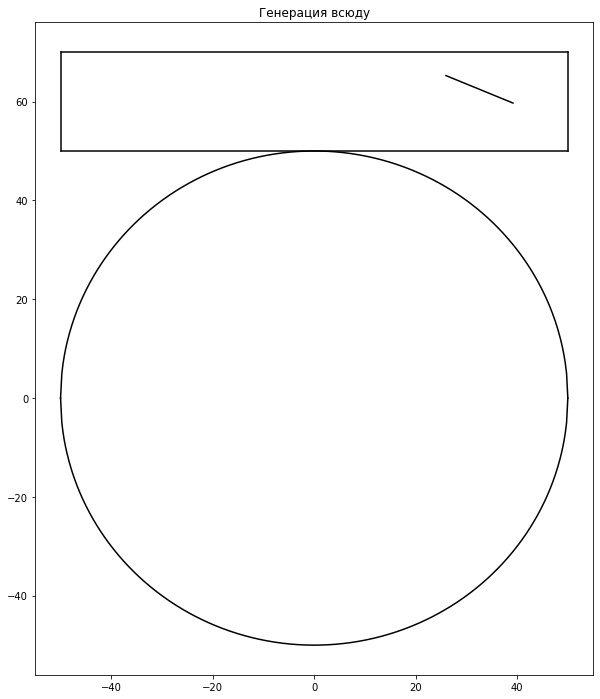

In [ ]:
plt.figure(figsize=(10,10*6/5))

p_in_all = generate_in_all_place()
p_in_rect = generate_in_rect()

x = [p_in_all[0], p_in_rect[0]]
y = [p_in_all[1], p_in_rect[1]]

plt.plot(x1, y1, x1, y2, x2, y3, x2, y4, x3, y5, x4, y5, x, y, color='k')
plt.title('Генерация всюду')
plt.show()

In [ ]:
N = 10000

print(f'Оценка расстояния при генерации только в круге {np.mean([np.linalg.norm(generate_in_circle() - generate_in_rect()) for i in range(N)])}')

Оценка расстояния при генерации только в круге 71.39865530071478


In [ ]:
N = 10000

print(f'Оценка расстояния при генерации во всем ДК {np.mean([np.linalg.norm(generate_in_all_place() - generate_in_rect()) for i in range(N)])}')

Оценка расстояния при генерации во всем ДК 63.80961328144173


P.1.1.3. Случайно поставить на шахматную доску черного слона, черного короля и белого короля так, чтобы не поставить шах.

Куда можно поставить белого короля, если на поле стоят черный король и черный слон? Можно поставить вне точек атаки и нахождения короля и слона , но если король стоит на линии атаки слона - то можно поставить туда, где король не атакует и мешает слону.

Куда можно поставить черного короля, если на поле стоит белый король и черный слон? Можно поставить всюду, где не атакует белый король и где не стоят сами фигуры.

Куда можно поставить черного слона, если на поле стоит белый и черный короли? Туда, где он не будет атаковать белого короля и где не стоят сами фигуры. Но если черный король закрывает атаку от слона - то можно поставить и туда.

In [ ]:
def possible_moves(cur_point, figure_type):
    res = []
    if figure_type == 'bishop':
        for i in [-1, 1]:
            for j in [-1, 1]:
                x = cur_point[0]
                y = cur_point[1]
                while x + i >= 1 and x + i <= 8 and y + j >= 1 and y + j <= 8:
                    x += i
                    y += j
                    res.append((x, y))
        return res
    if figure_type == 'king':
        for i in [-1, 0, 1]:
            for j in [-1, 0, 1]:
                if i == 0 and j == 0:
                    continue
                x = cur_point[0] + i
                y = cur_point[1] + j
                if x >= 1 and x <= 8 and y >= 1 and y <= 8:
                    res.append((x, y))
        return res

    return None

In [ ]:
possible_moves([8, 7], 'bishop')

[(7, 6), (6, 5), (5, 4), (4, 3), (3, 2), (2, 1), (7, 8)]

In [ ]:
def move_black_king(bb, wk):
    all_points = set([(i, j) for i in range(1, 9) for j in range(1, 9)])
    wk_poss_moves = set(possible_moves(wk, 'king'))

    left_moves = all_points - wk_poss_moves - set([bb]) - set([wk])
    return list(left_moves)#[st.randint.rvs(low=0, high=len(left_moves))]
    # return left_moves

def move_white_king(bk, bb):
    all_points = set([(i, j) for i in range(1, 9) for j in range(1, 9)])
    bk_poss_moves = set(possible_moves(bk, 'king'))
    bb_poss_moves = set(possible_moves(bb, 'bishop'))

    if bk not in bb_poss_moves:
        left_moves = list(all_points - bk_poss_moves - bb_poss_moves - set([bb]) - set([bk]))
    else:
        left_moves = list(all_points - bk_poss_moves - bb_poss_moves - set([bb]) - set([bk]))
        dest = [(bk[0] - bb[0]) / abs(bk[0] - bb[0]), (bk[1] - bb[1]) / abs(bk[0] - bb[0])]
        x = bk[0] + dest[0]
        y = bk[1] + dest[1]
        while True:
          x = x + dest[0]
          y = y + dest[1]
          if x >= 1 and x <= 8 and y >= 1 and y <= 8:
              left_moves.append((int(x), int(y)))
          else:
              break
    return left_moves#[st.randint.rvs(low=0, high=len(left_moves))]

def move_black_bishop(bk, wk):
    all_points = set([(i, j) for i in range(1, 9) for j in range(1, 9)])
    wk_can_be_attacked_from = set(possible_moves(wk, 'bishop'))

    left_moves = []

    if bk not in wk_can_be_attacked_from:
        left_moves = list(all_points - wk_can_be_attacked_from - set([wk]) - set([bk]))
    else:
        left_moves = list(all_points - wk_can_be_attacked_from - set([wk]) - set([bk]))
        dest = [(bk[0] - wk[0]) / abs(bk[0] - wk[0]), (bk[1] - wk[1]) / abs(bk[0] - wk[0])]
        x = bk[0]
        y = bk[1]
        while True:
          x = x + dest[0]
          y = y + dest[1]
          if x >= 1 and x <= 8 and y >= 1 and y <= 8:
              left_moves.append((int(x), int(y)))
          else:
              break
    return left_moves#[st.randint.rvs(low=0, high=len(left_moves))]

In [ ]:
!pip3 install chess

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import chess

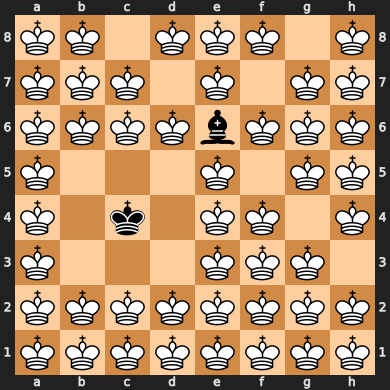

In [ ]:
bb = (5, 3)
bk = (3, 5)
arr = sorted(move_white_king(bk, bb) + [bk, bb], key=lambda x: (x[1], x[0]))
res = ''
for i in range(1, 9):
    last_val = 1
    for el in arr:
        if el[1] == i:
            if el[0] - last_val > 1:
                res += str(el[0] - last_val - 1)
                if el == bk:
                    res += 'k'
                elif el == bb:
                    res += 'b'
                else:
                    res += 'K'
            else:
                if el == bk:
                    res += 'k'
                elif el == bb:
                    res += 'b'
                else:
                    res += 'K'
            last_val = el[0]
        else:
            continue
    if last_val != 8:
        res += str(8 - last_val)
    if i != 8:
        res+= '/'
res += ' w - - 0 1'

board = chess.Board(res)
board

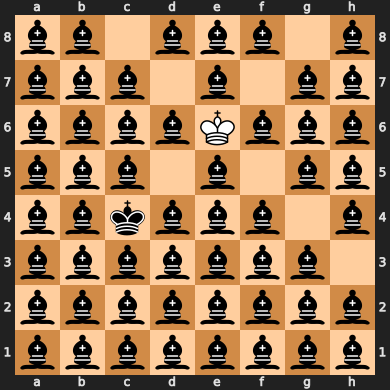

In [ ]:
wk = (5, 3)
bk = (3, 5)
arr = sorted(move_black_bishop(bk, wk) + [bk, wk], key=lambda x: (x[1], x[0]))
res = ''
for i in range(1, 9):
    last_val = 1
    for el in arr:
        if el[1] == i:
            if el[0] - last_val > 1:
                res += str(el[0] - last_val - 1)
                if el == bk:
                    res += 'k'
                elif el == wk:
                    res += 'K'
                else:
                    res += 'b'
            else:
                if el == bk:
                    res += 'k'
                elif el == bb:
                    res += 'K'
                else:
                    res += 'b'
            last_val = el[0]
        else:
            continue
    if last_val != 8:
        res += str(8 - last_val)
    if i != 8:
        res+= '/'
res += ' w - - 0 1'

board = chess.Board(res)
board

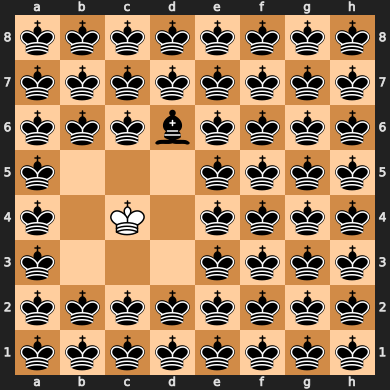

In [ ]:
bb = (4, 3)
wk = (3, 5)
arr = sorted(move_black_king(bb, wk) + [bb, wk], key=lambda x: (x[1], x[0]))
res = ''
for i in range(1, 9):
    last_val = 1
    for el in arr:
        if el[1] == i:
            if el[0] - last_val > 1:
                res += str(el[0] - last_val - 1)
                if el == bb:
                    res += 'b'
                elif el == wk:
                    res += 'K'
                else:
                    res += 'k'
            else:
                if el == bb:
                    res += 'b'
                elif el == bb:
                    res += 'K'
                else:
                    res += 'k'
            last_val = el[0]
        else:
            continue
    if last_val != 8:
        res += str(8 - last_val)
    if i != 8:
        res+= '/'
res += ' w - - 0 1'

board = chess.Board(res)
board

In [ ]:
def move_black_king(bb, wk):
    all_points = set([(i, j) for i in range(1, 9) for j in range(1, 9)])
    wk_poss_moves = set(possible_moves(wk, 'king'))

    left_moves = list(all_points - wk_poss_moves - set([bb]) - set([wk]))
    return left_moves[st.randint.rvs(low=0, high=len(left_moves))]
    # return left_moves

def move_white_king(bk, bb):
    all_points = set([(i, j) for i in range(1, 9) for j in range(1, 9)])
    bk_poss_moves = set(possible_moves(bk, 'king'))
    bb_poss_moves = set(possible_moves(bb, 'bishop'))

    left_moves = []

    if bk not in bb_poss_moves:
        left_moves = list(all_points - bk_poss_moves - bb_poss_moves - set([bb]) - set([bk]))
    else:
        left_moves = list(all_points - bk_poss_moves - bb_poss_moves - set([bb]) - set([bk]))
        dest = [(bk[0] - bb[0]) / abs(bk[0] - bb[0]), (bk[1] - bb[1]) / abs(bk[0] - bb[0])]
        x = bk[0] + dest[0]
        y = bk[1] + dest[1]
        while True:
          x = x + dest[0]
          y = y + dest[1]
          if x >= 1 and x <= 8 and y >= 1 and y <= 8:
              left_moves.append((int(x), int(y)))
          else:
              break
    return left_moves[st.randint.rvs(low=0, high=len(left_moves))]

def move_black_bishop(bk, wk):
    all_points = set([(i, j) for i in range(1, 9) for j in range(1, 9)])
    wk_can_be_attacked_from = set(possible_moves(wk, 'bishop'))

    left_moves = []

    if bk not in wk_can_be_attacked_from:
        left_moves = list(all_points - wk_can_be_attacked_from - set([wk]) - set([bk]))
    else:
        left_moves = list(all_points - wk_can_be_attacked_from - set([wk]) - set([bk]))
        dest = [(bk[0] - wk[0]) / abs(bk[0] - wk[0]), (bk[1] - wk[1]) / abs(bk[0] - wk[0])]
        x = bk[0]
        y = bk[1]
        while True:
          x = x + dest[0]
          y = y + dest[1]
          if x >= 1 and x <= 8 and y >= 1 and y <= 8:
              left_moves.append((int(x), int(y)))
          else:
              break
    return left_moves[st.randint.rvs(low=0, high=len(left_moves))]

In [ ]:
def generate_state_without_check(steps=100):
    bb = (2, 1)
    bk = (1, 1)
    wk = (3, 5)

    for i in range(steps):
        bb = move_black_bishop(bk, wk)

        bk = move_black_king(bb, wk)

        wk = move_white_king(bk, bb)

    return {bb:'b', bk:'k', wk:'K'}

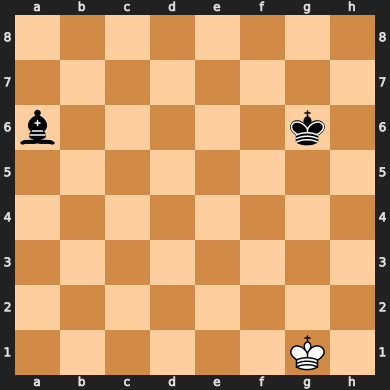

In [ ]:
d = generate_state_without_check()
res = ''
for j in range(1, 9):
    counter = 0
    for i in range(1, 9):
        added = False
        for el in d.keys():
            if el == (i, j):
                if counter != 0:
                    res += str(counter)
                    res += d[el]
                else:
                    res += d[el]
                added = True
                counter = 0
        if not added:
            counter += 1
    if counter != 0:
        res += str(counter)
    if j != 8:
        res += '/'

res += ' w - - 0 1'

board = chess.Board(res)
board